In [111]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
sns.set_theme()
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.datasets import make_classification
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

In [112]:
data_train = pd.read_csv(r"C:\Users\marce_5rke3hg\OneDrive\Área de Trabalho\Datas\house-prices-advanced-regression-techniques\train.csv")
data_apply = pd.read_csv(r"C:\Users\marce_5rke3hg\OneDrive\Área de Trabalho\Datas\house-prices-advanced-regression-techniques\test.csv")

In [113]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [114]:
data_apply

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [115]:
data_result = pd.concat([data_train,data_apply], ignore_index = True)
data_result.iloc[1460]

Id                 1461
MSSubClass           20
MSZoning             RH
LotFrontage        80.0
LotArea           11622
                  ...  
MoSold                6
YrSold             2010
SaleType             WD
SaleCondition    Normal
SalePrice           NaN
Name: 1460, Length: 81, dtype: object

In [116]:
data_result = data_result.drop(['Id'], axis = 1)

In [117]:
object_columns = data_result.select_dtypes(include=['object']).columns 
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

In [118]:
for column in object_columns:
    column_data = data_result[column].values.reshape(-1, 1)
    
    encoded_data = onehot_encoder.fit_transform(column_data)
    
    new_column_names = [f"{column}_{category}" for category in onehot_encoder.get_feature_names_out([column])]
    
    encoded_df = pd.DataFrame(encoded_data, columns=new_column_names)
    
    data_result = pd.concat([data_result, encoded_df], axis=1)
    
    data_result = data_result.drop(column, axis=1)

In [119]:
data_set1 = data_result.loc[:1459]
data_set1['SalePrice'].tail()

1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, dtype: float64

In [120]:
data_set2 = data_result.loc[1460:]
data_set2['SalePrice'].head()

1460   NaN
1461   NaN
1462   NaN
1463   NaN
1464   NaN
Name: SalePrice, dtype: float64

In [121]:
data_set1 = data_set1.replace(np.nan,0)
data_set2 = data_set2.replace(np.nan,0)

In [122]:
X = data_set1.drop('SalePrice', axis=1)
y = data_set1['SalePrice']

## Removing Outliers

In [123]:
from pyod.models.iforest import IForest

In [124]:
detector = IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=5000, n_jobs=1, random_state=42,
    verbose=0)

In [125]:
model = detector.fit(X,y)

In [126]:
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 1, 0, 0])

In [127]:
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([1314,  146], dtype=int64))

In [128]:
confiança_pervisões = detector.decision_scores_
confiança_pervisões

array([-0.07837179, -0.04018502, -0.07052722, ...,  0.00253364,
       -0.03056459, -0.05064519])

In [129]:
outliers = []
for i in range(len(previsoes)):
    if previsoes[i] == 1:
        outliers.append(i)

In [130]:
data_set1 = data_set1.drop(outliers)

In [131]:
X = data_set1.drop('SalePrice', axis=1)
y = data_set1['SalePrice']

In [132]:
from pycaret.regression import *
setup(data= data_set1, target='SalePrice', session_id=42)

,Description,Value
0,Session id,42
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1314, 269)"
4,Transformed data shape,"(1314, 269)"
5,Transformed train set shape,"(919, 269)"
6,Transformed test set shape,"(395, 269)"
7,Numeric features,268
8,Preprocess,True
9,Imputation type,simple


In [133]:
top3 = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,16408.8628,592269596.0903,23858.7570,0.9053,0.1332,0.0949,0.0230
gbr,Gradient Boosting Regressor,15292.1257,594393102.4558,23908.9266,0.9047,0.1198,0.0863,0.2130
lasso,Lasso Regression,17198.3444,629514764.4939,24674.5664,0.8984,0.1399,0.1006,0.1010
lr,Linear Regression,17415.2294,640529759.9602,24906.3719,0.8964,0.1418,0.1021,0.0270
lightgbm,Light Gradient Boosting Machine,16087.8730,663342389.8101,25247.0710,0.8939,0.1250,0.0901,0.1790
xgboost,Extreme Gradient Boosting,16963.3056,698024956.8000,25899.7820,0.8872,0.1314,0.0956,0.1460
en,Elastic Net,18359.4872,777322172.7643,27322.3286,0.8759,0.1524,0.1054,0.1330
et,Extra Trees Regressor,16958.5848,771764931.1294,27291.0234,0.8755,0.1351,0.0954,0.6120
rf,Random Forest Regressor,17288.1448,786688173.9775,27442.5497,0.8740,0.1343,0.0967,0.6680
omp,Orthogonal Matching Pursuit,19155.2899,795200848.8865,27695.7812,0.8718,0.1725,0.1126,0.0220


In [134]:
top3

[Ridge(random_state=42),
 GradientBoostingRegressor(random_state=42),
 Lasso(random_state=42)]

In [135]:
ridge = create_model('ridge', fold = 4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18806.7041,694813651.6050,26359.3181,0.8958,0.1605,0.1105
1,16417.3183,700000139.4364,26457.5157,0.9049,0.1202,0.0905
2,16090.9651,564570826.0912,23760.6992,0.8932,0.1332,0.0950
3,15008.6309,396879851.0394,19921.8436,0.9228,0.1217,0.0910
Mean,16580.9046,589066117.0430,24124.8442,0.9042,0.1339,0.0967
Std,1386.8155,123515665.5141,2656.6918,0.0116,0.0162,0.0081


In [136]:
## Linha 21

In [137]:
rng = np.random.RandomState(0)

In [138]:
from scipy.stats import randint, uniform
from sklearn.linear_model import Ridge

ridge_params = { 'alpha':[0.001,2],
                 'fit_intercept': [True,False],
                 'solver':["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"],
                 'random_state':[1,None]}

tunne_ridge = tune_model(ridge, n_iter=10000, optimize='RMSE', custom_grid=ridge_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21311.4624,970558658.2884,31153.7904,0.8772,0.1476,0.1115
1,16610.8905,456005266.7828,21354.2798,0.8970,0.1364,0.1016
2,15058.1886,454152714.8358,21310.8591,0.9294,0.1825,0.0957
3,17187.4598,933899569.7289,30559.7704,0.8978,0.1218,0.0891
4,18578.5888,823652616.5340,28699.3487,0.8831,0.1308,0.1025
5,14710.3614,683429124.4377,26142.4774,0.8895,0.1280,0.0840
6,14197.4067,313241319.0842,17698.6248,0.9279,0.1096,0.0848
7,16325.2720,441173974.9117,21004.1419,0.9054,0.1242,0.0946
8,14960.6794,414095651.6016,20349.3403,0.9249,0.1267,0.0922


Fitting 10 folds for each of 56 candidates, totalling 560 fits


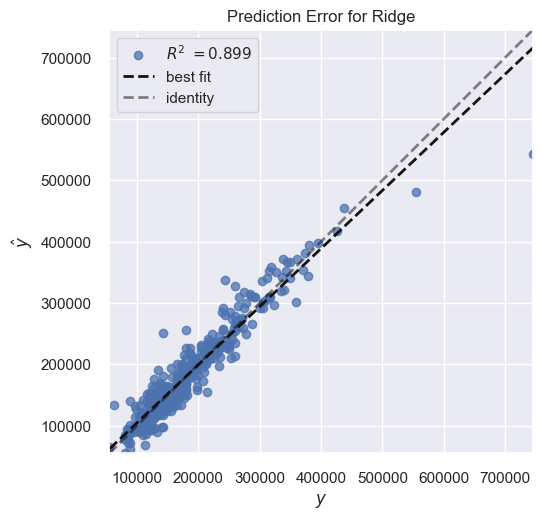

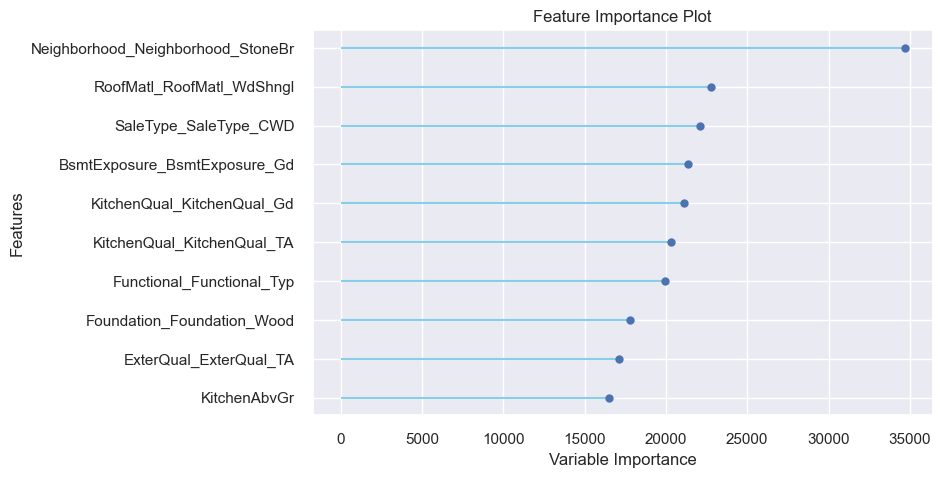

In [139]:
plot_model(tunne_ridge, plot='error')

plot_model(tunne_ridge, plot='feature')

In [140]:
predict_model(tunne_ridge)

final_ridge_model = finalize_model(tunne_ridge)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,16226.1618,565154217.1565,23772.9724,0.8993,0.1335,0.0968


In [141]:
save_model(final_ridge_model, 'Modelo Final Ridge Pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MSSubClass', 'LotFrontage',
                                              'LotArea', 'OverallQual',
                                              'OverallCond', 'YearBuilt',
                                              'YearRemodAdd', 'MasVnrArea',
                                              'BsmtFinSF1', 'BsmtFinSF2',
                                              'BsmtUnfSF', 'TotalBsmtSF',
                                              '1stFlrSF', '2ndFlrSF',
                                              'LowQualFinSF', 'GrLivArea',
                                              'BsmtFullBath', 'BsmtHalfBath',
                                              'FullBath', 'HalfBath...
                                              'GarageYrBlt', 'GarageCars',
                                              'GarageArea', 'WoodDeckSF',
                                 

In [142]:
saved_final_ridge_model = load_model('Modelo Final Ridge Pycaret')

Transformation Pipeline and Model Successfully Loaded


In [143]:
nova_previsao = predict_model(saved_final_ridge_model, data=data_set2)
nova_previsao.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,179647.5410,38677877707.3494,196666.9207,0.0000,12.0161,nan


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_SaleType_Oth,SaleType_SaleType_WD,SaleType_SaleType_nan,SaleCondition_SaleCondition_AdjLand,SaleCondition_SaleCondition_Alloca,SaleCondition_SaleCondition_Family,SaleCondition_SaleCondition_Normal,SaleCondition_SaleCondition_Partial,SalePrice,prediction_label
1460,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,112802.403433
1461,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,170875.419595
1462,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,190913.021874
1463,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,196183.793624
1464,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,203500.342913


## PREVISÕES

In [144]:
#Previsao
prev = predict_model(final_ridge_model, data=data_set1)
prev

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,12973.6777,372456300.4029,19299.1269,0.9376,0.1035,0.0747


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_SaleType_Oth,SaleType_SaleType_WD,SaleType_SaleType_nan,SaleCondition_SaleCondition_AdjLand,SaleCondition_SaleCondition_Alloca,SaleCondition_SaleCondition_Family,SaleCondition_SaleCondition_Normal,SaleCondition_SaleCondition_Partial,SalePrice,prediction_label
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500.0,208090.255118
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,181500.0,205756.074343
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223500.0,207995.883018
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,140000.0,163223.963746
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000.0,285579.833499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500,7,5,2004,2005,0.0,410.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,185000.0,192495.170786
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,175000.0,172766.791565
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,210000.0,210044.319622
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,142125.0,142878.271248


In [145]:
#Previsao
prev = predict_model(final_ridge_model, data=data_set2)
prev

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,179647.5410,38677877707.3494,196666.9207,0.0000,12.0161,nan


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_SaleType_Oth,SaleType_SaleType_WD,SaleType_SaleType_nan,SaleCondition_SaleCondition_AdjLand,SaleCondition_SaleCondition_Alloca,SaleCondition_SaleCondition_Family,SaleCondition_SaleCondition_Normal,SaleCondition_SaleCondition_Partial,SalePrice,prediction_label
1460,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,112802.403433
1461,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,170875.419595
1462,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,190913.021874
1463,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,196183.793624
1464,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,203500.342913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,83674.273797
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72692.926220
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173003.965754
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,120329.664872


In [146]:
#prevdropped = prev.drop(['SalePrice'],axis = 1)

#prevdropped_renamed = prevdropped.rename(columns={'prediction_label': 'SalePrice'})

#saleprice_with_index = prevdropped_renamed[['SalePrice']].copy()
#saleprice_with_index['Id'] = range(1461, 1461 + len(saleprice_with_index))

#print(saleprice_with_index[['Id', 'SalePrice']])

In [147]:
#saleprice_with_index.to_csv('submission.csv', index=False)

## XGBOOST

In [148]:
gbr = create_model('gbr',fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20473.5818,1147904513.9280,33880.7396,0.8548,0.1470,0.1043
1,14019.5015,398063834.7203,19951.5372,0.9101,0.1181,0.0843
2,13768.2027,475366101.3823,21802.8920,0.9261,0.1034,0.0807
3,14504.0207,848820780.1720,29134.5290,0.9071,0.1128,0.0750
4,15446.1529,700649721.1550,26469.7888,0.9006,0.1082,0.0822
5,16058.8287,673473164.1525,25951.3615,0.8911,0.1294,0.0900
6,14484.4278,384755715.5775,19615.1909,0.9114,0.1075,0.0809
7,15296.7197,414894958.0927,20368.9705,0.9110,0.1451,0.1006
8,16377.5313,587744754.5429,24243.4477,0.8935,0.1382,0.0965


In [158]:
gbr_params = { 

    'subsample': uniform(0.1, 1),  # Continuous parameter
    'max_features': ['auto', 'sqrt', 'log2', None],
    'alpha': uniform(0, 2),  # Assuming 'alpha' is a regularization parameter
    'ccp_alpha': uniform(0, 1),  # Assuming 'ccp_alpha' is a regularization parameter

}

tunne_gbr = tune_model(gbr, n_iter=1000, optimize='RMSE', custom_grid=gbr_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20673.4910,1124184314.3355,33528.8579,0.8578,0.1507,0.1056
1,14313.4956,426584534.6003,20653.9230,0.9036,0.1176,0.0850
2,12764.1197,344883647.2353,18571.0432,0.9464,0.1017,0.0782
3,13647.1894,675130435.2655,25983.2722,0.9261,0.1073,0.0730
4,14350.0303,569739554.6806,23869.2177,0.9191,0.1067,0.0786
5,15001.9089,547147749.9748,23391.1896,0.9116,0.1243,0.0872
6,14359.6186,381758379.3357,19538.6381,0.9121,0.1087,0.0804
7,15348.8763,457745797.0635,21394.9947,0.9018,0.1539,0.1029
8,16834.0501,625027558.6001,25000.5512,0.8867,0.1415,0.0987


Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

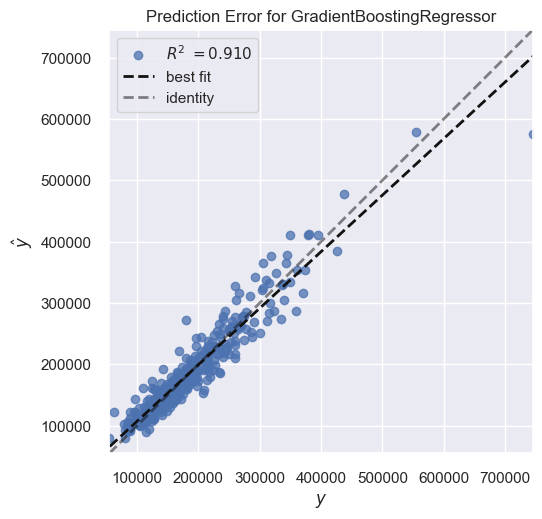

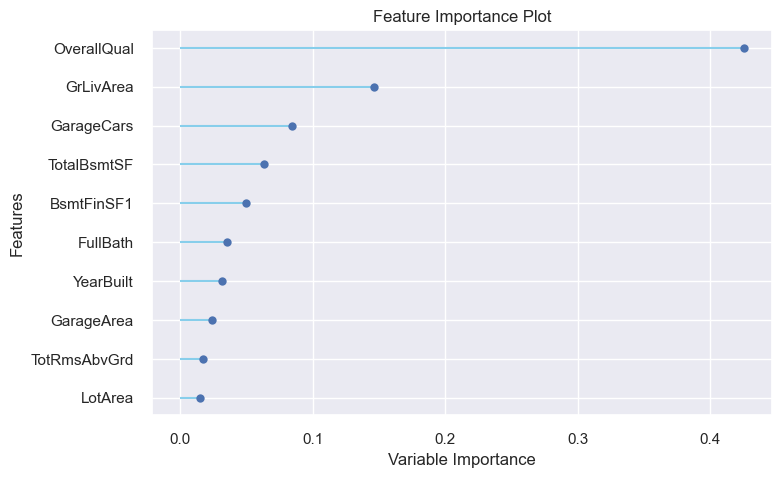

In [159]:
plot_model(tunne_gbr, plot='error')

plot_model(tunne_gbr, plot='feature')

In [160]:
predict_model(tunne_gbr)

final_gbr_model = finalize_model(tunne_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15737.2946,507501854.8546,22527.8018,0.9096,0.1157,0.0885


In [161]:
save_model(final_gbr_model, 'Modelo Final GBR Pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MSSubClass', 'LotFrontage',
                                              'LotArea', 'OverallQual',
                                              'OverallCond', 'YearBuilt',
                                              'YearRemodAdd', 'MasVnrArea',
                                              'BsmtFinSF1', 'BsmtFinSF2',
                                              'BsmtUnfSF', 'TotalBsmtSF',
                                              '1stFlrSF', '2ndFlrSF',
                                              'LowQualFinSF', 'GrLivArea',
                                              'BsmtFullBath', 'BsmtHalfBath',
                                              'FullBath', 'HalfBath...
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                        

In [162]:
saved_final_gbr_model = load_model('Modelo Final GBR Pycaret')

Transformation Pipeline and Model Successfully Loaded


In [163]:
#Previsao
prev_g = predict_model(final_gbr_model, data=data_set1)
prev_g

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,9895.0227,177028788.5785,13305.2166,0.9703,0.0829,0.0597


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_SaleType_Oth,SaleType_SaleType_WD,SaleType_SaleType_nan,SaleCondition_SaleCondition_AdjLand,SaleCondition_SaleCondition_Alloca,SaleCondition_SaleCondition_Family,SaleCondition_SaleCondition_Normal,SaleCondition_SaleCondition_Partial,SalePrice,prediction_label
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500.0,206753.100837
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,181500.0,170362.694347
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223500.0,208091.850387
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,140000.0,167863.610768
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000.0,282455.246106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500,7,5,2004,2005,0.0,410.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,185000.0,188476.003280
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,175000.0,169154.537995
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,210000.0,205839.652689
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,142125.0,134056.531965


## Gradient Boosting Regressor	= R^2 0.9703

* Applying

In [164]:
nova_previsao_g = predict_model(saved_final_gbr_model, data=data_set2)
nova_previsao_g.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,181026.7516,39037232377.2725,197578.4208,0.0000,12.0346,nan


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_SaleType_Oth,SaleType_SaleType_WD,SaleType_SaleType_nan,SaleCondition_SaleCondition_AdjLand,SaleCondition_SaleCondition_Alloca,SaleCondition_SaleCondition_Family,SaleCondition_SaleCondition_Normal,SaleCondition_SaleCondition_Partial,SalePrice,prediction_label
1460,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,123613.190309
1461,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,160418.979930
1462,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181976.034500
1463,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,183372.666770
1464,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,192260.825219


In [165]:
prevdropped = nova_previsao_g.drop(['SalePrice'],axis = 1)

prevdropped_renamed = prevdropped.rename(columns={'prediction_label': 'SalePrice'})

saleprice_with_index = prevdropped_renamed[['SalePrice']].copy()
saleprice_with_index['Id'] = range(1461, 1461 + len(saleprice_with_index))

print(saleprice_with_index[['Id', 'SalePrice']])

        Id      SalePrice
1460  1461  123613.190309
1461  1462  160418.979930
1462  1463  181976.034500
1463  1464  183372.666770
1464  1465  192260.825219
...    ...            ...
2914  2915   91226.626800
2915  2916   85164.219604
2916  2917  164483.936588
2917  2918  123196.594309
2918  2919  221906.811401

[1459 rows x 2 columns]


In [166]:
saleprice_with_index.to_csv('submission.csv', index=False)